# Spatial Data

Spatial data can be viewed as a subset of generic data that **focuses on the location**. 
Spatial data science treats location, distance, and spatial interaction as core aspects of the data
and employs specialized methods and software to store, retrieve, explore,
analyze, visualize and learn from such data. 

The first step is to read in some spatial data! To do this, we'll use the [GeoPandas](https://geopandas.org/) library.

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas **extends the datatypes used by pandas** to allow spatial operations on geometric types. Geometric operations are performed by **shapely**. Geopandas further depends on **fiona** for file access and **descartes** and **matplotlib** for plotting.

There are many, many different geospatial file formats, such as [shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), and [GPKG](https://en.wikipedia.org/wiki/GeoPackage).

+ shapefile is the most common file type 
+ all of these file types can be quickly loaded with the geopandas.read_file() function.


In [162]:
import geopandas as gpd

In [163]:
# This code cell loads a shapefile containing information about forests, wilderness areas, 
# and other lands under the care of the Department of Environmental Conservation in the state of New York.

full_data = gpd.read_file("data/DEC_lands/DEC_lands.shp")
full_data.head() 

OBJECTID          CATEGORY UNIT                          FACILITY  \
0         1  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
1         2  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
2         3  FOR PRES DET PAR  CFP        HANCOCK FP DETACHED PARCEL   
3         4  FOR PRES DET PAR  CFP  GREENE COUNTY FP DETACHED PARCEL   
4         6   FOREST PRESERVE  AFP         SARANAC LAKES WILD FOREST   

         CLASS            UMP                       DESCRIPTIO  REGION  \
0  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
1  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
2  WILD FOREST           None  DELAWARE COUNTY DETACHED PARCEL       4   
3  WILD FOREST           None                             None       4   
4  WILD FOREST  SARANAC LAKES                             None       5   

     COUNTY                                     URL            SOURCE UPDATE_  \
0  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
1  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
2  DELAWARE                  http://www.dec.ny.gov/      DELAWARE RPP    5/12   
3    GREENE                  http://www.dec.ny.gov/        GREENE RPP    5/12   
4     ESSEX  http://www.dec.ny.gov/lands/22593.html  DECRP, ESSEX RPP   12/96   

      OFFICE       ACRES  LANDS_UID GREENCERT    SHAPE_AREA    SHAPE_LEN  \
0   STAMFORD  738.620192        103         N  2.990365e+06  7927.662385   
1   STAMFORD  282.553140       1218         N  1.143940e+06  4776.375600   
2   STAMFORD  234.291262       1780         N  9.485476e+05  5783.070364   
3   STAMFORD  450.106464       2060         N  1.822293e+06  7021.644833   
4  RAY BROOK   69.702387       1517         N  2.821959e+05  2663.909932   

                                            geometry  
0  POLYGON ((486093.245 4635308.586, 486787.235 4...  
1  POLYGON ((491931.514 4637416.256, 491305.424 4...  
2  POLYGON ((486000.287 4635834.453, 485007.550 4...  
3  POLYGON ((541716.775 4675243.268, 541217.579 4...  
4  POLYGON ((583896.043 4909643.187, 583891.200 4...

In [164]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

## Build a custom map
Consider a scenario where you'd like to use this data to plan a weekend camping trip. Instead of relying on crowd-sourced reviews online, you decide to create your own map. This way, you can tailor the trip to your specific interests.

In [165]:
# How many lands of each type are there?
full_data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

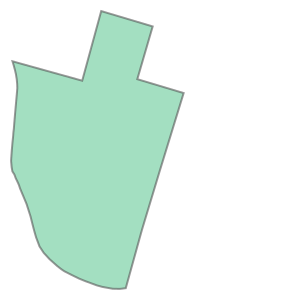

In [166]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = full_data.loc[full_data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands = wild_lands.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
# wild_lands.head()
wild_lands.iloc[0]['geometry']

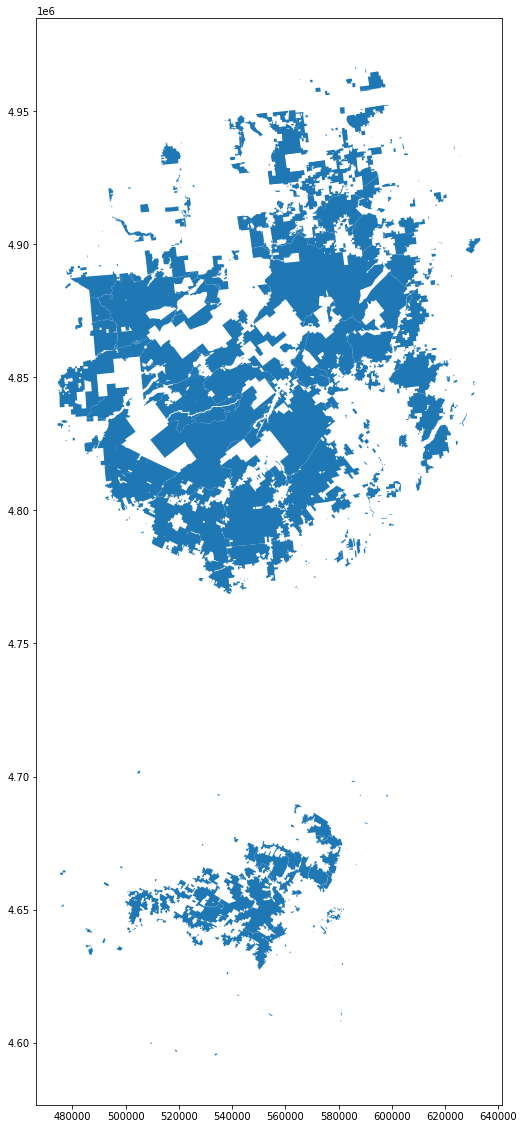

In [167]:
wild_lands.plot(figsize=(16,20))
# Every GeoDataFrame contains a special "geometry" column. 
# It contains all of the geometric objects that are displayed when we call the plot() method.

# Type of geometries: point, polyline (aka linestring), polygon, multipolygon

In [168]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("data/DEC_POI/Decptsofinterest.shp")
# POI_data.head(10)
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# # Foot trails in New York state (LineString)
roads_trails = gpd.read_file("data/DEC_roadstrails/Decroadstrails.shp")
# roads_trails.head(10)
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# # County boundaries in New York state (Polygon)
counties = gpd.read_file("data/NY_county_boundaries/NY_county_boundaries.shp")


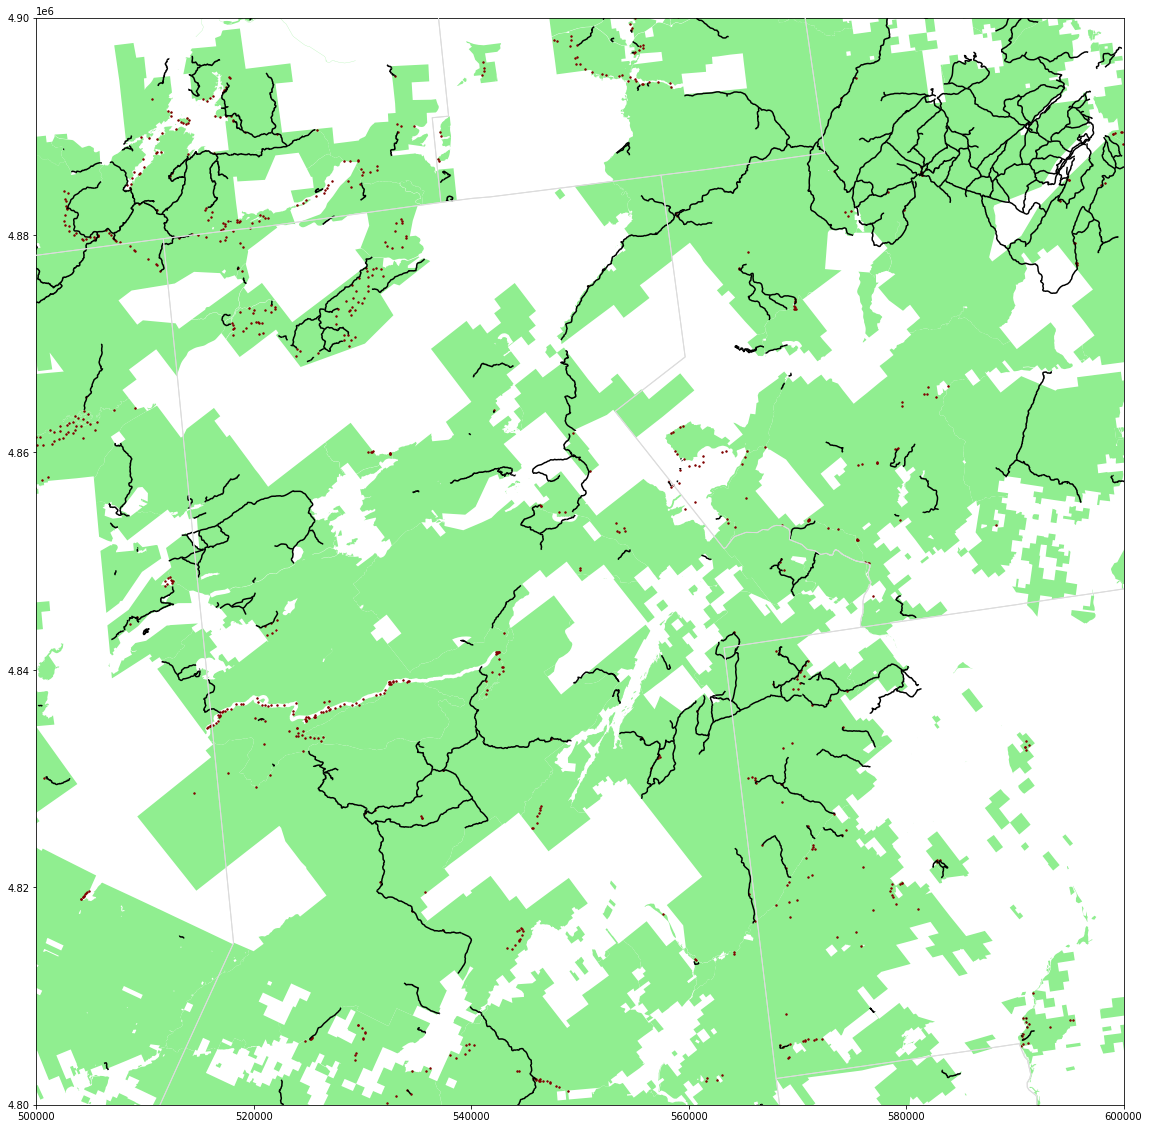

In [169]:
import matplotlib.pyplot as plt
# Define a base map with county boundaries
ax = counties.plot(figsize=(20,20), color='none', edgecolor='gainsboro', zorder=3 )
plt.xlim([500000,600000])
plt.ylim([4800000,4900000])

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

## Coordinate Reference Systems (CRS)
The maps you create portray the surface of the earth in two dimensions. But, as you know, **the world is actually a three-dimensional sphere**. So we have to use a method called a **map projection** to render it as a flat surface.

Map projections can't be 100% accurate. Each projection distorts the surface of the Earth in some way, while retaining some useful property. For instance,

+ the equal-area projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. This is a good choice, if you'd like to calculate the area of a country or city, for example.
+ the equidistant projections (like ["Azimuthal Equidistant projection"](https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection)) preserve distance. This would be a good choice for calculating flight distance.

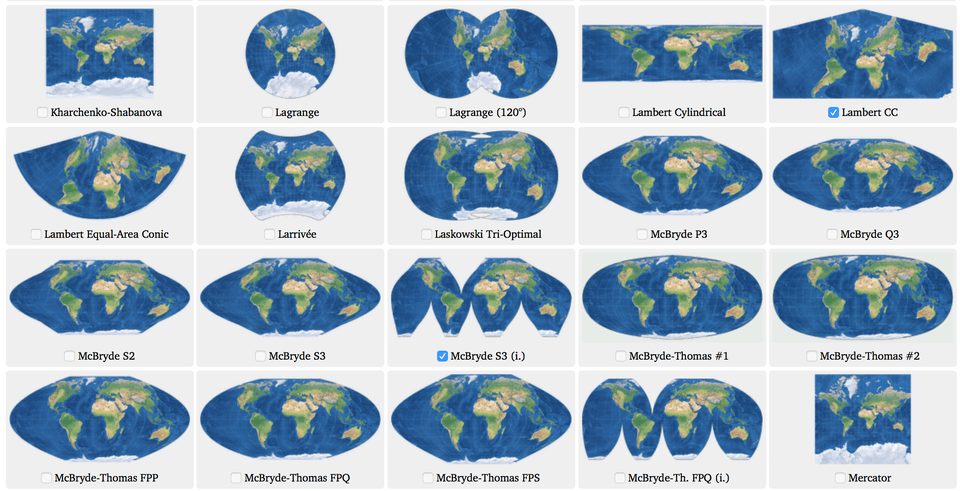

In [170]:
print(campsites.crs)

{'init': 'epsg:26918'}


Coordinate reference systems are referenced by [European Petroleum Survey Group (EPSG)](http://www.epsg.org/) codes. 

When creating a GeoDataFrame from a CSV file, we have to set the CRS. `EPSG 4326` corresponds to coordinates in latitude and longitude. It's known as [World Geodesic System](https://en.wikipedia.org/wiki/World_Geodetic_System).

`df = pd.read_csv("...")`

`gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))`

`gdf.crs = {'init': 'epsg:4326'}`

When plotting multiple GeoDataFrames, it's important that they all use the same CRS. 

The `to_crs(epsg=...)` method modifies only the "geometry" column: all other columns are left as-is.


## Interactive Map

In [171]:
import folium # well-known package for making interactive maps based on openstreet maps; there are some other packages to handle huge data on WebGL
from folium import Choropleth, Circle, Marker, Icon
from folium.plugins import HeatMap, MarkerCluster
import math
import numpy as np
import pandas as pd

Pass any of the following to the “tiles” keyword:

+ OpenStreetMap
+ ”Stamen Terrain”, “Stamen Toner”, “Stamen Watercolor”
+ ”CartoDB positron”, “CartoDB dark_matter”
+ ”Mapbox Bright”, “Mapbox Control Room” (Limited zoom)
+ ”Cloudmade” (Must pass API key)
+ ”Mapbox” (Must pass API key)

You can pass a custom tileset to Folium by passing a Leaflet-style URL to the tiles parameter: http://{s}.yourtiles.com/{z}/{x}/{y}.png

In [230]:
# Create a map
m_1 = folium.Map(location=[35.7,51.3], tiles='Stamen Terrain', zoom_start=5)

# Display the map
m_1

In [173]:
# Create a map
m_1 = folium.Map(location=[35.7,51.3], tiles='CartoDB dark_matter', zoom_start=11)

# Display the map
m_1

In [174]:
# Create a map
m_1 = folium.Map(location=[35.7,51.3], tiles='Stamen Toner', zoom_start=11)

# Display the map
m_1

### Add layers to the base map

In [175]:
# Load the data
crimes = pd.read_csv("data/crimes_in_Boston/crime.csv", encoding='latin-1')

# Drop rows with missing locations
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]

# Print the first five rows of the table
crimes.head()

INCIDENT_NUMBER  OFFENSE_CODE          OFFENSE_CODE_GROUP  \
0       I182070945           619                     Larceny   
6       I182070933           724                  Auto Theft   
8       I182070931           301                     Robbery   
19      I182070915           614  Larceny From Motor Vehicle   
24      I182070908           522        Residential Burglary   

                      OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                      LARCENY ALL OTHERS      D14            808      NaN   
6                              AUTO THEFT       B2            330      NaN   
8                        ROBBERY - STREET       C6            177      NaN   
19  LARCENY THEFT FROM MV - NON-ACCESSORY       B2            181      NaN   
24      BURGLARY - RESIDENTIAL - NO FORCE       B2            911      NaN   

       OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0   2018-09-02 13:00:00  2018      9      Sunday    13  Part One   
6   2018-09-03 21:25:00  2018      9      Monday    21  Part One   
8   2018-09-03 20:48:00  2018      9      Monday    20  Part One   
19  2018-09-02 18:00:00  2018      9      Sunday    18  Part One   
24  2018-09-03 18:38:00  2018      9      Monday    18  Part One   

               STREET        Lat       Long                     Location  
0          LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
6         NORMANDY ST  42.306072 -71.082733  (42.30607218, -71.08273260)  
8   MASSACHUSETTS AVE  42.331521 -71.070853  (42.33152148, -71.07085307)  
19         SHIRLEY ST  42.325695 -71.068168  (42.32569490, -71.06816778)  
24    ANNUNCIATION RD  42.335062 -71.093168  (42.33506218, -71.09316781)

We add markers to the map with `folium.Marker()`. Each marker below corresponds to a different robbery.

In [232]:
# Since the data is big for visualization, we just get a part of it
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]
# Create a map
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodb positron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
#     Marker([row['Lat'], row['Long']]).add_to(m_2)
    Marker([row['Lat'], row['Long']], icon=Icon(color='red'),popup=row['DAY_OF_WEEK']).add_to(m_2)

# Display the map
m_2

### Interactive cluster of markers

If we have a lot of markers to add, `folium.plugins.MarkerCluster()` can help to declutter the map. Each marker is added to a `MarkerCluster` object.

See other plugins: https://python-visualization.github.io/folium/plugins.html

In [234]:
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodb positron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    m = Marker([row['Lat'], row['Long']],popup=row['DAY_OF_WEEK'])
    folium.plugins.BeautifyIcon(icon='arrow-down', icon_shape='marker').add_to(m) #https://github.com/masajid390/BeautifyMarker
    mc.add_child(m)
m_3.add_child(mc)

# Display the map
m_3

### Bubble map
A bubble map uses circles instead of markers. By varying the size and color of each circle, we can also show the relationship between location and two other variables.

We create a bubble map by using `folium.Circle()` to iteratively add circles. In the code cell below, robberies that occurred in hours 9-12 are plotted in green, whereas robberies from hours 13-17 are plotted in red.

In [178]:
def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'
    
# Create a base map
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
        location=[daytime_robberies.iloc[i]['Lat'], daytime_robberies.iloc[i]['Long']],
        radius=40,
        color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4)

# Display the map
m_4

### Heatmap
To create a heatmap, we use `folium.plugins.HeatMap()`. This shows the density of crime in different areas of the city, where red areas have relatively more criminal incidents. This plugin is a wrapper for https://github.com/Leaflet/Leaflet.heat

In [179]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)
# HeatMap(data=crimes[['Lat', 'Long']], radius=10, gradient={0.4: 'yellow', 0.65: 'red', 1: 'black'}).add_to(m_5)

# Display the map
m_5

### Choropleth maps
To understand how crime varies by police district, a choropleth map can be used.

As a first step, we create a GeoDataFrame where each district is assigned a different row, and the "geometry" column contains the geographical boundaries.

In [180]:
# GeoDataFrame with geographical boundaries of Boston police districts
districts_full = gpd.read_file('data/Police_Districts/Police_Districts.shp')
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

geometry
DISTRICT                                                   
A15       MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ...
A7        MULTIPOLYGON (((-70.99644 42.39557, -70.99644 ...
A1        POLYGON ((-71.05200 42.36884, -71.05169 42.368...
C6        POLYGON ((-71.04406 42.35403, -71.04412 42.353...
D4        POLYGON ((-71.07416 42.35724, -71.07359 42.357...

In [236]:
plot_dict = crimes.DISTRICT.value_counts()
plot_dict

D4     2885
B2     2231
A1     2130
C11    1899
B3     1421
C6     1289
D14     892
E13     831
E18     684
A7      630
E5      499
A15     291
Name: DISTRICT, dtype: int64

In [182]:
# Create a base map
m_6 = folium.Map(location=[42.32,-71.0589], tiles='cartodb positron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=districts.__geo_interface__, #geo_data shoud be a GeoJSON FeatureCollection containing the boundaries of each geographical area. The __geo_interface__ attribute provides such a json for GeoDataframe
           data=plot_dict, # This is a dictionary; the key is the district name (index in the geo_data) and value is the count
           key_on="feature.id", 
           fill_color='YlOrRd', 
           legend_name='Major criminal incidents (Jan-Aug 2018)'
          ).add_to(m_6)

# Display the map
m_6


## Geocoding
Geocoding is the process of converting the name of a place or an address to a location on a map. If you have ever looked up a geographic location based on a landmark description with Google Maps, Bing Maps, or Baidu Maps, for instance, then you have used a geocoder!



In [183]:
from geopandas.tools import geocode # this part is based on geopy library

To use the geocoder, we need only provide:

+ the name or address as a Python string, and
+ the name of the provider; to avoid having to provide an API key, we'll use the OpenStreetMap Nominatim geocoder.

If the geocoding is successful, it returns a GeoDataFrame with two columns:

+ the "geometry" column contains the (latitude, longitude) location, and
+ the "address" column contains the full address.

In [184]:
result = geocode("Amirkabir University of Technology", provider="nominatim")
result # you can get latitude and longitude of the location from the y and x attributes of the result (it's NOT long and lat!)

geometry  \
0  POINT (51.40992 35.70463)   

                                             address  
0  دانشگاه صنعتی امیرکبیر, ولی عصر, ولیعصر, منطقه...

In [185]:
unis = pd.read_csv('data/iran_top_universities.csv', header=0, delimiter=',')
unis

Universities  \
0                  Amirkabir University of Technology   
1              Mashhad University of Medical Sciences   
2                     Sharif University of Technology   
3               Tehran University of Medical Sciences   
4           Iran University of Science and Technology   
5                    Isfahan University of Technology   
6      Shahid Beheshti University of Medical Sciences   
7   Tabriz University of Medical Sciences and Heal...   
8                                University of Tabriz   
9      University of Tehran Kish International Campus   
10        Khaje Nassir Toosi University of Technology   
11                         Shahid Beheshti University   
12                                  Shiraz University   
13                         Tarbiat Modares University   
14                               University of Tehran   

   Times Higher Education Ranking (2020)  \
0                                    501   
1                                    501   
2                                    501   
3                                    501   
4                                    601   
5                                    601   
6                                    601   
7                                    601   
8                                    601   
9                                    601   
10                                   801   
11                                   801   
12                                   801   
13                                         
14                                         

   Shanghai Jiao Tong University Ranking (2019)  \
0                                           501   
1                                                 
2                                           401   
3                                           401   
4                                           801   
5                                           801   
6                                           701   
7                                                 
8                                           901   
9                                           301   
10                                                
11                                          901   
12                                          901   
13                                          501   
14                                                

   TopUniversities Ranking (2020) U.S. News & World Report Ranking (2020)  
0                             489                                     678  
1                                                                     867  
2                             407                                     591  
3                                                                     676  
4                             601                                     870  
5                                                                     595  
6                                                                     998  
7                                                                          
8                                                                     841  
9                             601                                     405  
10                                                                         
11                            801                                          
12                            801                                     850  
13                                                                    810  
14                            601

In [186]:
unis['Universities']

0                    Amirkabir University of Technology
1                Mashhad University of Medical Sciences
2                       Sharif University of Technology
3                 Tehran University of Medical Sciences
4             Iran University of Science and Technology
5                      Isfahan University of Technology
6        Shahid Beheshti University of Medical Sciences
7     Tabriz University of Medical Sciences and Heal...
8                                  University of Tabriz
9        University of Tehran Kish International Campus
10          Khaje Nassir Toosi University of Technology
11                           Shahid Beheshti University
12                                    Shiraz University
13                           Tarbiat Modares University
14                                 University of Tehran
Name: Universities, dtype: object

In [187]:
def my_geocoder(row):
    try:
        point = geocode(row, provider='nominatim').geometry.iloc[0]
        print(point)
        return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
    except:
        print(row)
        return None

unis[['Latitude', 'Longitude', 'geometry']] = unis.apply(lambda x: my_geocoder(x['Universities']),axis=1)


print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(unis["Latitude"])) / len(unis)) * 100))

# Drop universities that were not successfully geocoded
universities = unis.loc[~np.isnan(unis["Latitude"])]
universities = gpd.GeoDataFrame(universities, geometry=universities.geometry)
universities.crs = {'init': 'epsg:4326'}
universities.head()

POINT (51.40991836480446 35.70462735)
POINT (51.40991836480446 35.70462735)
Mashhad University of Medical Sciences
POINT (51.35125096954399 35.7036227)
POINT (51.3951857 35.7079101)
POINT (51.50574053947987 35.74279425)
POINT (51.53359186031162 32.7204126)
Shahid Beheshti University of Medical Sciences
Tabriz University of Medical Sciences and Health Services
POINT (46.3298484 38.0612553)
University of Tehran Kish International Campus
Khaje Nassir Toosi University of Technology
POINT (49.6861844 34.0850796)
POINT (52.5244772 29.6387199)
POINT (51.3809632 35.7249689)
POINT (51.39366001550395 35.70135595)
66.66666666666667% of addresses were geocoded!


Universities  \
0         Amirkabir University of Technology   
2            Sharif University of Technology   
3      Tehran University of Medical Sciences   
4  Iran University of Science and Technology   
5           Isfahan University of Technology   

  Times Higher Education Ranking (2020)  \
0                                   501   
2                                   501   
3                                   501   
4                                   601   
5                                   601   

  Shanghai Jiao Tong University Ranking (2019) TopUniversities Ranking (2020)  \
0                                          501                            489   
2                                          401                            407   
3                                          401                                  
4                                          801                            601   
5                                          801                                  

  U.S. News & World Report Ranking (2020)   Latitude  Longitude  \
0                                     678  35.704627  51.409918   
2                                     591  35.703623  51.351251   
3                                     676  35.707910  51.395186   
4                                     870  35.742794  51.505741   
5                                     595  32.720413  51.533592   

                    geometry  
0  POINT (51.40992 35.70463)  
2  POINT (51.35125 35.70362)  
3  POINT (51.39519 35.70791)  
4  POINT (51.50574 35.74279)  
5  POINT (51.53359 32.72041)

In [188]:
# Create a map
m = folium.Map(location=[35.7,51.3], tiles='Stamen Toner', zoom_start=5)

# Add points to the map
for idx, row in universities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Universities']).add_to(m)

# Display the map
m

### Spatial join
You can use `merge` function for Geopandas dataframe like Pandas dataframe for joining data. However, a new operation is available on spatial data for joining. For exmaple, you can join two rows if their polygons intersects or if a polygon contains a point. It's based on geometric operations.

In [239]:
# sections = gpd.read_file('data/iran_sections/irn_admbnda_adm2_unhcr_20190514.shp')
sections = gpd.read_file('data/iran_sections/irn_admbnda_adm1_unhcr_20190514.shp')

m = folium.Map(location=[35.7,51.3], tiles='Stamen Toner', zoom_start=5)

In [240]:
sections.head()

Shape_Leng  Shape_Area                    ADM1_EN  \
0    4.346753    0.523109                     Alborz   
1   10.218890    1.845273                    Ardabil   
2   16.019141    2.088545                    Bushehr   
3    7.087819    1.555897  Chaharmahal and Bakhtiari   
4   14.145806    4.646606            East Azerbaijan   

                              ADM1_FA ADM1_PCODE ADM1_REF ADM1ALT1EN  \
0                       Ø§ÙØ¨Ø±Ø²â      IR001     None       None   
1                        Ø§Ø±Ø¯Ø¨ÛÙ      IR002     None       None   
2                          Ø¨ÙØ´ÙØ±      IR003     None       None   
3  ÚÙØ§Ø±Ù
Ø­Ø§Ù Ù Ø¨Ø®ØªÛØ§Ø±Û      IR004     None       None   
4         Ø¢Ø°Ø±Ø¨Ø§ÛØ¬Ø§Ù Ø´Ø±ÙÛ      IR005     None       None   

  ADM1ALT2EN ADM1ALT1FA ADM1ALT2FA                     ADM0_EN  \
0       None       None       None  Iran (Islamic Republic of)   
1       None       None       None  Iran (Islamic Republic of)   
2       None       None       None  Iran (Islamic Republic of)   
3       None       None       None  Iran (Islamic Republic of)   
4       None       None       None  Iran (Islamic Republic of)   

                                  ADM0_FA ADM0_PCODE        date     validOn  \
0  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
1  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
2  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
3  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
4  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   

  validTo                                           geometry  
0    None  POLYGON ((50.49594 36.34221, 50.50150 36.34166...  
1    None  POLYGON ((48.03206 39.69253, 48.09512 39.63819...  
2    None  MULTIPOLYGON (((51.41462 27.90553, 51.41510 27...  
3    None  POLYGON ((49.72980 32.80907, 49.73119 32.80851...  
4    None  POLYGON ((47.36634 39.41979, 47.37967 39.40590...

In [241]:
universities.head()

Universities  \
0         Amirkabir University of Technology   
2            Sharif University of Technology   
3      Tehran University of Medical Sciences   
4  Iran University of Science and Technology   
5           Isfahan University of Technology   

  Times Higher Education Ranking (2020)  \
0                                   501   
2                                   501   
3                                   501   
4                                   601   
5                                   601   

  Shanghai Jiao Tong University Ranking (2019) TopUniversities Ranking (2020)  \
0                                          501                            489   
2                                          401                            407   
3                                          401                                  
4                                          801                            601   
5                                          801                                  

  U.S. News & World Report Ranking (2020)   Latitude  Longitude  \
0                                     678  35.704627  51.409918   
2                                     591  35.703623  51.351251   
3                                     676  35.707910  51.395186   
4                                     870  35.742794  51.505741   
5                                     595  32.720413  51.533592   

                    geometry  
0  POINT (51.40992 35.70463)  
2  POINT (51.35125 35.70362)  
3  POINT (51.39519 35.70791)  
4  POINT (51.50574 35.74279)  
5  POINT (51.53359 32.72041)

In [242]:
sections.head()

Shape_Leng  Shape_Area                    ADM1_EN  \
0    4.346753    0.523109                     Alborz   
1   10.218890    1.845273                    Ardabil   
2   16.019141    2.088545                    Bushehr   
3    7.087819    1.555897  Chaharmahal and Bakhtiari   
4   14.145806    4.646606            East Azerbaijan   

                              ADM1_FA ADM1_PCODE ADM1_REF ADM1ALT1EN  \
0                       Ø§ÙØ¨Ø±Ø²â      IR001     None       None   
1                        Ø§Ø±Ø¯Ø¨ÛÙ      IR002     None       None   
2                          Ø¨ÙØ´ÙØ±      IR003     None       None   
3  ÚÙØ§Ø±Ù
Ø­Ø§Ù Ù Ø¨Ø®ØªÛØ§Ø±Û      IR004     None       None   
4         Ø¢Ø°Ø±Ø¨Ø§ÛØ¬Ø§Ù Ø´Ø±ÙÛ      IR005     None       None   

  ADM1ALT2EN ADM1ALT1FA ADM1ALT2FA                     ADM0_EN  \
0       None       None       None  Iran (Islamic Republic of)   
1       None       None       None  Iran (Islamic Republic of)   
2       None       None       None  Iran (Islamic Republic of)   
3       None       None       None  Iran (Islamic Republic of)   
4       None       None       None  Iran (Islamic Republic of)   

                                  ADM0_FA ADM0_PCODE        date     validOn  \
0  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
1  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
2  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
3  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   
4  Ø§ÛØ±Ø§Ù (Ø¬Ù
ÙÙØ±Û Ø§Ø³ÙØ§Ù
Û)         IR  2019-04-09  2019-05-14   

  validTo                                           geometry  
0    None  POLYGON ((50.49594 36.34221, 50.50150 36.34166...  
1    None  POLYGON ((48.03206 39.69253, 48.09512 39.63819...  
2    None  MULTIPOLYGON (((51.41462 27.90553, 51.41510 27...  
3    None  POLYGON ((49.72980 32.80907, 49.73119 32.80851...  
4    None  POLYGON ((47.36634 39.41979, 47.37967 39.40590...

In [243]:
unis_sections = gpd.sjoin(sections,universities)
unis_sections.crs

{'init': 'epsg:4326'}

In [244]:
unis_sections.head()

Shape_Leng  Shape_Area          ADM1_EN                      ADM1_FA  \
4    14.145806    4.646606  East Azerbaijan  Ø¢Ø°Ø±Ø¨Ø§ÛØ¬Ø§Ù Ø´Ø±ÙÛ   
5    17.564258   11.366856             Fars                     ÙØ§Ø±Ø³   
11   19.198351   10.356070          Isfahan                 Ø§ØµÙÙØ§Ù   
18   11.163474    2.852910          Markazi                   Ù
Ø±Ú©Ø²Û   
27    8.261077    1.353262           Tehran                   ØªÙØ±Ø§Ù   

   ADM1_PCODE ADM1_REF ADM1ALT1EN ADM1ALT2EN ADM1ALT1FA ADM1ALT2FA  ...  \
4       IR005     None       None       None       None       None  ...   
5       IR006     None       None       None       None       None  ...   
11      IR012     None       None       None       None       None  ...   
18      IR019     None       None       None       None       None  ...   
27      IR028     None       None       None       None       None  ...   

   validTo                                           geometry index_right  \
4     None  POLYGON ((47.36634 39.41979, 47.37967 39.40590...           8   
5     None  POLYGON ((52.20658 31.66877, 52.20714 31.66849...          12   
11    None  POLYGON ((51.82851 34.50550, 51.83212 34.50550...           5   
18    None  POLYGON ((50.36205 35.57081, 50.36261 35.57053...          11   
27    None  POLYGON ((51.59433 36.08609, 51.59794 36.08415...           0   

                          Universities Times Higher Education Ranking (2020)  \
4                 University of Tabriz                                   601   
5                    Shiraz University                                   801   
11    Isfahan University of Technology                                   601   
18          Shahid Beheshti University                                   801   
27  Amirkabir University of Technology                                   501   

   Shanghai Jiao Tong University Ranking (2019)  \
4                                           901   
5                                           901   
11                                          801   
18                                          901   
27                                          501   

   TopUniversities Ranking (2020)  U.S. News & World Report Ranking (2020)  \
4                                                                      841   
5                             801                                      850   
11                                                                     595   
18                            801                                            
27                            489                                      678   

     Latitude  Longitude  
4   38.061255  46.329848  
5   29.638720  52.524477  
11  32.720413  51.533592  
18  34.085080  49.686184  
27  35.704627  51.409918  

[5 rows x 25 columns]

In [245]:
m = folium.Map(location=[35.7,51.3], tiles='Stamen Toner', zoom_start=5)

# Add points to the map
for idx, row in universities.iterrows():
    Marker([row['Latitude'], row['Longitude']], popup=row['Universities']).add_to(m)

for idx, row in unis_sections.iterrows():
    vers = []
    for p in row['geometry'].exterior.coords:
        q = (p[1],p[0])
        vers.append(q)
    m.add_child(folium.vector_layers.Polygon(vers, popup=row['ADM1_EN']))
    
m

## Proximity analysis

In this section, we'll work with a dataset from the US Environmental Protection Agency (EPA) that tracks releases of toxic chemicals in Philadelphia, Pennsylvania, USA.

**Question: Does Philly air quality agency have enough coverage to measure air quality effectively?**

In [195]:
releases = gpd.read_file("data/toxic_release_pennsylvania/toxic_release_pennsylvania.shp") 
releases.head()


YEAR          CITY        COUNTY  ST   LATITUDE  LONGITUDE  \
0  2016  PHILADELPHIA  PHILADELPHIA  PA  40.005901 -75.072103   
1  2016  PHILADELPHIA  PHILADELPHIA  PA  39.920120 -75.146410   
2  2016  PHILADELPHIA  PHILADELPHIA  PA  40.023880 -75.220450   
3  2016  PHILADELPHIA  PHILADELPHIA  PA  39.913540 -75.198890   
4  2016  PHILADELPHIA  PHILADELPHIA  PA  39.913540 -75.198890   

                CHEMICAL UNIT_OF_ME  TOTAL_RELE  \
0            FORMIC ACID     Pounds       0.160   
1        ETHYLENE GLYCOL     Pounds   13353.480   
2  CERTAIN GLYCOL ETHERS     Pounds     104.135   
3         LEAD COMPOUNDS     Pounds    1730.280   
4                BENZENE     Pounds   39863.290   

                         geometry  
0  POINT (2718560.227 256380.179)  
1  POINT (2698674.606 224522.905)  
2  POINT (2676833.394 261701.856)  
3  POINT (2684030.004 221697.388)  
4  POINT (2684030.004 221697.388)

We'll also work with a dataset that contains readings from air quality monitoring stations in the same city.

In [196]:
stations = gpd.read_file("data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

SITE_NAME                         ADDRESS BLACK_CARB ULTRAFINE_ CO SO2  \
0       LAB       1501 East Lycoming Avenue          N          N  Y   N   
1       ROX        Eva and Dearnley Streets          N          N  N   N   
2       NEA  Grant Avenue and Ashton Street          N          N  N   N   
3       CHS          500 South Broad Street          N          N  N   N   
4       NEW               2861 Lewis Street          N          N  Y   Y   

  OZONE NO2 NOY_NO PM10  ... PAMS_VOC TSP_11101 TSP_METALS TSP_LEAD  \
0     Y   Y      Y    N  ...        Y         N          Y        N   
1     N   N      N    N  ...        N         N          Y        N   
2     Y   N      N    N  ...        N         N          N        N   
3     N   N      N    N  ...        N         N          Y        N   
4     Y   N      Y    Y  ...        N         Y          N        Y   

  TOXICS_TO1 MET COMMUNITY_   LATITUDE  LONGITUDE  \
0          y   N          N  40.008606 -75.097624   
1          Y   N          N  40.050461 -75.236966   
2          N   Y          N  40.072073 -75.013128   
3          Y   N          N  39.944510 -75.165442   
4          N   Y          N  39.991688 -75.080378   

                         geometry  
0  POINT (2711384.641 257149.310)  
1  POINT (2671934.290 271248.900)  
2  POINT (2734326.638 280980.247)  
3  POINT (2693078.580 233247.101)  
4  POINT (2716399.773 251134.976)  

[5 rows x 24 columns]

In [197]:
# Note that the geometry of datasets is not long and lat measurement
print(stations.crs)
print(releases.crs)

{'init': 'epsg:2272'}
{'init': 'epsg:2272'}


We also check the CRS to see which units it uses (meters, feet, or something else). In this case, EPSG 2272 has units of feet. (If you like, you can check this [here](https://epsg.io/2272).)

In [224]:
# Create heatmap of release incidents
philly_hm = folium.Map(location=[40,-75], tiles='CartoDB dark_matter', zoom_start=10)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(philly_hm)
philly_hm

###  Measuring distance

In [199]:
recent_release = releases.iloc[360]
recent_release


YEAR                                                       2012
CITY                                               PHILADELPHIA
COUNTY                                             PHILADELPHIA
ST                                                           PA
LATITUDE                                                39.9135
LONGITUDE                                              -75.1989
CHEMICAL      SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" O...
UNIT_OF_ME                                               Pounds
TOTAL_RELE                                               365600
geometry            POINT (2684030.004021309 221697.3882902659)
Name: 360, dtype: object

The list of geometric manipulation functions is available [here](https://geopandas.readthedocs.io/en/latest/geometric_manipulations.html)

In [200]:
# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances #in feet

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [201]:
print('Mean distance to monitoring stations: {} feet'.format(distances.mean()))

Mean distance to monitoring stations: 33516.28487007786 feet


In [202]:
print('Closest monitoring station ({} feet):'.format(distances.min()))
print(stations.iloc[distances.idxmin()][["ADDRESS", "LATITUDE", "LONGITUDE"]])

Closest monitoring station (3780.623590556444 feet):
ADDRESS      3100 Penrose Ferry Road
LATITUDE                     39.9128
LONGITUDE                   -75.1854
Name: 9, dtype: object


### Creating a buffer
If we want to understand all points on a map that are some radius away from a point, the simplest way is to create a buffer.

The code cell below creates a GeoSeries two_mile_buffer containing 12 different Polygon objects. Each polygon is a buffer of 2 miles (or, 2*5280 feet) around a different air monitoring station.

In [203]:
two_mile_buffer = stations.geometry.buffer(2*5280) # each mile is 5280 feet
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [225]:
from folium import GeoJson
# m = folium.Map(location=[40,-75], tiles='Stamen Toner', zoom_start=10)
# HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(philly_hm)

    
# Plot each buffer on the map
GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(philly_hm)

# Show the map
philly_hm

**Having hot zones of release incidents outside the coverage of air quality stations shows that government is not measuring air quality effectively.**

Now, to test if a toxic release occurred within 2 miles of any monitoring station, we could run 12 different tests for each polygon (to check individually if it contains the point).

But a more efficient way is to first collapse all of the polygons into a MultiPolygon object. We do this with the unary_union operation.

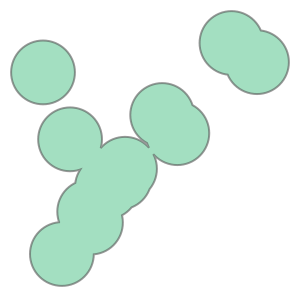

In [205]:
# Turn group of polygons into single multipolygon
sta_union = two_mile_buffer.geometry.unary_union

# Show the MultiPolygon object
sta_union

In [206]:
len(releases[releases['geometry'].within(sta_union)]) / len(releases) * 100

74.37272142397599

Stations are missing almost 25% percent of release.

Let's approximate the missing area

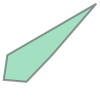

In [211]:
missed_releases = releases[releases['geometry'].within(sta_union)==False]
conhull = missed_releases.geometry.to_crs(epsg=4326).unary_union.convex_hull
conhull

In [221]:
grouped = missed_releases.groupby('CHEMICAL').sum()
grouped.sort_values('TOTAL_RELE' , ascending = False)

LATITUDE    LONGITUDE    TOTAL_RELE
CHEMICAL                                                                    
AMMONIA                               2243.946580 -4203.468820  1.953294e+06
1,1,1-TRICHLOROETHANE                 1081.404619 -2027.281053  9.079640e+05
CERTAIN GLYCOL ETHERS                 4485.229659 -8409.661042  7.734584e+05
NITRATE COMPOUNDS                      480.455400  -901.342800  6.174910e+05
ZINC COMPOUNDS                         800.626463 -1502.289125  4.296930e+05
...                                           ...          ...           ...
LEAD COMPOUNDS                         720.608192 -1351.785738  9.473024e+01
TOLUENE DIISOCYANATE (MIXED ISOMERS)   280.204540  -525.178360  6.200000e+01
SILVER                                 120.080868  -225.102987  3.000000e+00
COBALT COMPOUNDS                        39.909720   -75.138290  1.000000e+00
BENZO(G,H,I)PERYLENE                   400.315934  -751.104546  9.216600e-03

[65 rows x 3 columns]

In [248]:
missed_releases.CHEMICAL.value_counts()

CERTAIN GLYCOL ETHERS     112
TOLUENE                    71
XYLENE (MIXED ISOMERS)     65
STYRENE                    57
AMMONIA                    56
                         ... 
BROMOMETHANE                1
N-METHYL-2-PYRROLIDONE      1
COBALT COMPOUNDS            1
NICKEL COMPOUNDS            1
BARIUM                      1
Name: CHEMICAL, Length: 65, dtype: int64

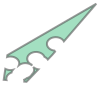

In [222]:
# type(sta_union)
sta_union_conv = two_mile_buffer.geometry.to_crs(epsg=4326).unary_union
missed_area = conhull.difference(sta_union_conv)
missed_area

In [227]:
m = folium.Map(location=[40,-75], tiles='CartoDB dark_matter', zoom_start=10)

HeatMap(data=missed_releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m)
GeoJson(missed_area).add_to(m)

m